# Finding Heavy Traffic Indicators on I-94

We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

## Reading Data

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [2]:
traffic = pd.read_csv(r'C:\Users\Andy\Desktop\Learning\Dataquest\Project_4\Metro_Interstate_Traffic_Volume.csv')

## Checking Data

In [3]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [6]:
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


From `traffic.info()`, we note that there are no missing or null values in the dataset. Most of the data are also type-formatted correctly with the exception of `date_time` that may need to be formatted as datetime.

From the first few and last few data, we notice that the dataset is collected hourly, between 2 Oct 2012 to 30 Sep 2018.

The following are the attribute information from the dataset source:
* temp - average temp in Kelvin
* rain_1h - amount in mm of rain that occurred in the hour
* snow_1h - amount in mm of snow that occurred in the hour
* clouds_all - percentage of cloud cover
* weather_main - short textual description of the current weather
* weather-description - longer textual description of the current weather
* date_time - hour of the data collected in local CST time
* traffic_volume - hourly I-94 ATR 301 reported westbound traffic volume

## Cleanning Data

From `traffic.describe()`, we notice the following possible abnormality:
* The highest recorded amount of rain is 9831.3mm, which seemed to be abnormally high. A quick check on the highest rainfall per hour via World Meteorological Organization's website shows recorded value of 305mm.
* The lowest recorded average temp is 0 Kelvin, which is exceptionally low. A quick google check for Minnesota shows that the lowest ever recorded temp is about 222 Kelvin.

We will delve deeper to check if indeed it is an abnormality. We will start with rainfall.

In [7]:
traffic['rain_1h'].value_counts().sort_index().tail(20)

15.75      1
16.00      2
16.38      3
16.51      1
18.03      1
18.42      1
18.80      1
19.90      3
20.07      4
20.24      3
21.42      3
23.80      3
25.32      3
25.46      3
27.57      3
28.70      2
31.75      1
44.45      1
55.63      1
9831.30    1
Name: rain_1h, dtype: int64

We notice that the hourly rainfall increases steadily to 55.63, before a huge jump to 9831.30. This confirmed that the entry might be an error.

We will hence remove this data from our dataset.

In [8]:
traffic = traffic[traffic['rain_1h'] < 305]

In [9]:
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48203.000000,48203.000000,48203.000000,48203.000000,48203.000000
mean,281.205437,0.130315,0.000222,49.361699,3259.771155
std,13.338030,1.003378,0.008168,39.015980,1986.854254
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,55.630000,0.510000,100.000000,7280.000000


Next, let's check on the abnormality for temperature.

In [10]:
traffic['temp'].value_counts().sort_index()

0.00      10
243.39     1
243.62     1
244.22     1
244.82     3
          ..
308.87     1
308.95     1
309.08     1
309.29     1
310.07     1
Name: temp, Length: 5843, dtype: int64

Here we notice that there are 10 entries with 0 Kelvin. The next lowest temperature is 243.39 Kelvin which is possible.

Hence we should remove the 10 entries with 0 Kelvin as they are likely to be errors.

In [11]:
traffic = traffic[traffic['temp'] > 0]
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48193.000000,48193.000000,48193.000000,48193.000000,48193.000000
mean,281.263786,0.130342,0.000222,49.371942,3260.174029
std,12.709364,1.003480,0.008169,39.013548,1986.754010
min,243.390000,0.000000,0.000000,0.000000,0.000000
25%,272.180000,0.000000,0.000000,1.000000,1194.000000
50%,282.460000,0.000000,0.000000,64.000000,3380.000000
75%,291.810000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,55.630000,0.510000,100.000000,7280.000000


## Analysing Data

Next, we will do some simple analysis of the traffic volume.

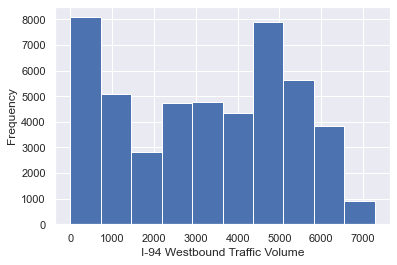

In [12]:
traffic['traffic_volume'].plot.hist()
plt.xlabel('I-94 Westbound Traffic Volume')
plt.show()

In [13]:
traffic['traffic_volume'].describe()

count    48193.000000
mean      3260.174029
std       1986.754010
min          0.000000
25%       1194.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

We note that for I-94 westbound traffic volume, it tends to either have low traffic or high traffic, and less to be moderate traffic.

To analyse if the traffic volume is influenced by daytime and nighttime, we'll start by dividing the dataset into two parts:
* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [14]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'], format='%Y-%m-%d %H:%M:%S')

In [15]:
traffic['date_time'].dtype

dtype('<M8[ns]')

In [16]:
traffic['date_time'].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48193, dtype: int64

### Analysing Data by Day and Night

In [17]:
daytime_traffic = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]

In [18]:
nighttime_traffic = traffic[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]

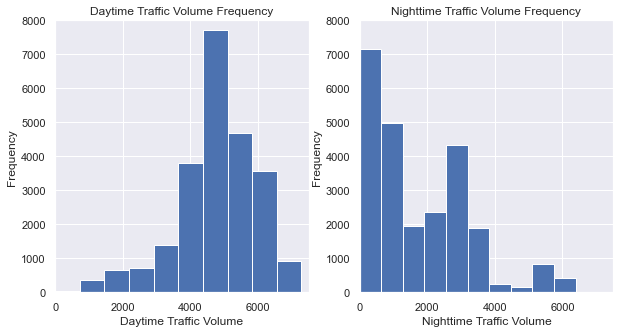

In [19]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
daytime_traffic['traffic_volume'].plot.hist()
plt.title('Daytime Traffic Volume Frequency')
plt.xlabel('Daytime Traffic Volume')
plt.xlim([0,7500])
plt.ylim([0,8000])

plt.subplot(1,2,2)
nighttime_traffic['traffic_volume'].plot.hist()
plt.title('Nighttime Traffic Volume Frequency')
plt.xlabel('Nighttime Traffic Volume')
plt.xlim([0,7500])
plt.ylim([0,8000])

plt.show()

From both histograms, we note that the traffic volume is higher in daytime as compared to nighttime.

Since we are trying to identify the factors causing heavy traffic, we will focus on the daytime data.

In [20]:
daytime_traffic['traffic_volume'].describe()

count    23874.000000
mean      4762.303761
std       1174.181562
min          0.000000
25%       4253.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [21]:
nighttime_traffic['traffic_volume'].describe()

count    24319.000000
mean      1785.530943
std       1441.868127
min          0.000000
25%        530.500000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:
* Month
* Day of the week
* Time of the day

### Analysing Data by Month (for Daytime Traffic)

In [22]:
month = daytime_traffic['date_time'].dt.month
daytime_traffic['month'] = month

In [23]:
by_month = daytime_traffic.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4715.096441
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4594.640303
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

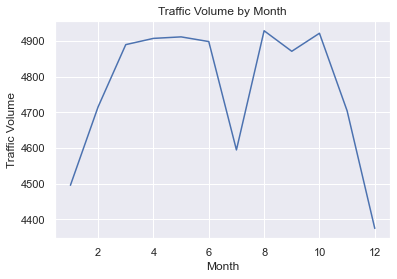

In [24]:
by_month['traffic_volume'].plot.line()
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume by Month')
plt.show()

We note that traffic volume is slighlty lower at the start, middle and end of the year. This coincides with typical school term break or holiday break season.

### Analysing Data by Day of the Week (for Daytime Traffic)

In [25]:
day = daytime_traffic['date_time'].dt.dayofweek #0 is Monday, 6 is Sunday
daytime_traffic['day'] = day

In [26]:
daytime_traffic.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,day
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,1
5,None,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181,10,1
6,None,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584,10,1
7,None,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015,10,1
8,None,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791,10,1
9,None,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770,10,1


In [27]:
by_day = daytime_traffic.groupby('day').mean()
by_day['traffic_volume']

day
0    4893.369983
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3437.790636
Name: traffic_volume, dtype: float64

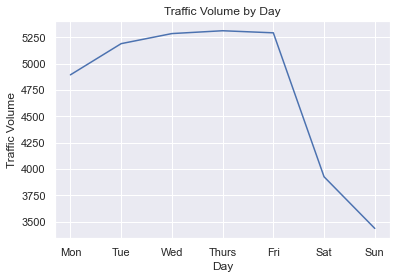

In [28]:
by_day['traffic_volume'].plot.line()
x = [0,1,2,3,4,5,6]
x1 = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']
plt.xticks(x,x1)
plt.xlabel('Day')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume by Day')
plt.show()

Quite clearly, we can see that traffic volume is higher on weekdays as compared to weekends.

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

### Analysing Data by Time of Day (for Daytime Traffic)

In [29]:
hour = daytime_traffic['date_time'].dt.hour
daytime_traffic['hour'] = hour
weekday_data = daytime_traffic[daytime_traffic['day'] <= 4].copy()
weekend_data = daytime_traffic[daytime_traffic['day'] > 4].copy()

In [30]:
weekday_by_hour = weekday_data.groupby('hour').mean()
weekday_by_hour['traffic_volume']

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5785.009489
18    4434.209431
Name: traffic_volume, dtype: float64

In [31]:
weekend_by_hour = weekend_data.groupby('hour').mean()
weekend_by_hour['traffic_volume']

hour
7     1590.406302
8     2339.690516
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64

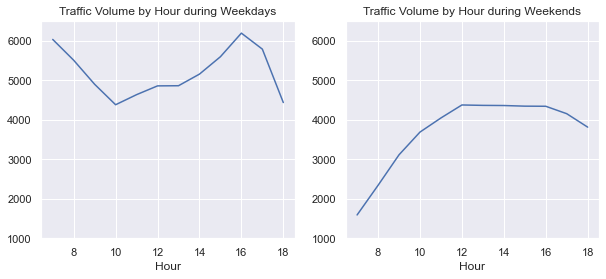

In [32]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
weekday_by_hour['traffic_volume'].plot.line()
plt.title('Traffic Volume by Hour during Weekdays')
plt.ylim(1000,6500)
plt.xlabel('Hour')

plt.subplot(1,2,2)
weekend_by_hour['traffic_volume'].plot.line()
plt.title('Traffic Volume by Hour during Weekends')
plt.ylim(1000,6500)
plt.xlabel('Hour')

plt.show()

Here we see that traffic volume by hour during weekdays is significantly higher than during weekends.

For weekdays, traffic volume is high early, as people commute to work. And thereafter drop as we go to the middle of the day as people will be at work. Traffic volume then picks up again towards the evening as people knock off from work. We note that the peak rush hours are 0700hrs and 1600hrs.

For weekends, traffic volume starts low, as people generally tend to slee in. Traffic volume starts to pick up as the day progresses as people start to go out on the roads for leisure. Traffic volume stays higher towards the evening as people could either be travelling out for night activities or returning home.

Another possible indicator of heavy traffic is weather. We can examine their correlation values to quickly establish some relationships between traffic volume and weather.

In [33]:
daytime_traffic.corr()['traffic_volume'][['temp','rain_1h','snow_1h','clouds_all']]

temp          0.125502
rain_1h      -0.040676
snow_1h       0.001260
clouds_all   -0.033311
Name: traffic_volume, dtype: float64

From the correlation values, it seemed like weather has a weak relationship with traffic volume. We will plot a scatter plot for temp which has the highest positive correlation value.

### Analysing Data by Temp (for Daytime Traffic)

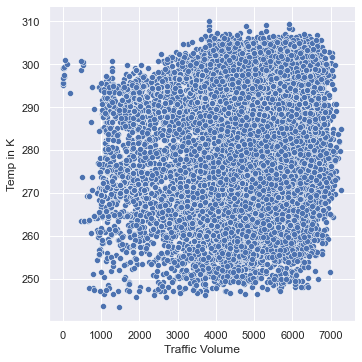

In [34]:
#sns.set_theme()
sns.relplot(data=daytime_traffic,x='traffic_volume',y='temp')
plt.xlabel('Traffic Volume')
plt.ylabel('Temp in K')
plt.show()

We will now check if there's any relationship to weather_main and weather_description.

### Analysing Data by Weather (for Daytime Traffic)

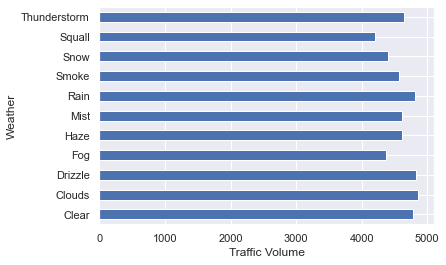

In [35]:
by_weather_main = daytime_traffic.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('Traffic Volume')
plt.ylabel('Weather')
plt.show()

From the general weather, we notice that traffic volume doesn't seemd to be influenced by any weather type. Let us delve deeper.

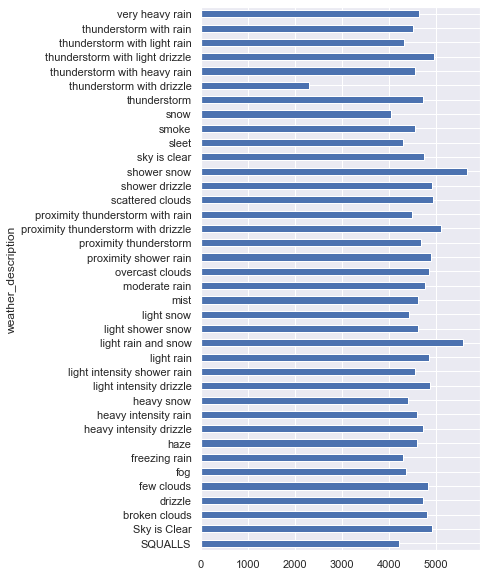

In [36]:
by_weather_description = daytime_traffic.groupby('weather_description').mean()
plt.figure(figsize=(5,10))
by_weather_description['traffic_volume'].plot.barh()
plt.show()

From here, we notice that there are two particular weather type that may result in higher traffic volume. First is shower snow, and second is light rain and now. This could suggest that on days when there is a combination of rain and show, it will result in higher traffic volume.

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

* Time indicators
 * The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
 * The traffic is usually heavier on business days compared to the weekends.
 * On business days, the rush hours are around 7 and 16.


* Weather indicators
 * Shower snow
 * Light rain and snow